# A Cournot oligopoly model

The Cournot oligopoly model analyses firm decisionmaking in markets with more than one, but a finite number of firms. These models are not particularly difficult to calculate analytically, but as soon as more than two firms are included the calculations can get long and tedious.

In this project I go through first a Cournot model with two firms analytically and numerically (a Cournot duopoly), whereafter I expand the model such that I can analyze it numerically while including more than two firms. I also check to see what happens when demand increases in the case of two firms, and also analyze what happens when the number of firms increase in equilibrium.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

My model setup is a general case for two identical firms. Each of these firms are profitmaximizing with respect to their own quantity produced, $q_i$. In here, marginal costs are constant, $MC = c$ Their maximization problem is defined:

$$
\max_{q_i} \pi_i = (p-MC)q_i
$$

The demand function, $p$, depends on a baseline max demand $a$ and the quantity produced by each firm, $q_1$ and $q_2$. The relationship between the parameters in front of the goods produced is the elasticity of substitution, but since the firms are identical they have the same parameter $b$. Demand is defined as:
$$
p = a - (b \cdot q_1 + b \cdot q_2) 
$$



# Analytical solution

The analytical solution is as follows: 

- Maximize firm 1's profits wrt. $q_1$
- Solve for $q_1$ as a function of $q_2$
- Maximize firm 2's profits wrt. $q_2$
- Insert solution for $q_1$ and solve for $q_2$ (as a function of parameters)
- Insert this solution for $q_2$ in the solution for $q_1$ (now a function of parameters)

The optimal $q_1$ and $q_2$ can now be inserted into the demand function to find the profit.

## General solution

In [2]:
#Define symbols used in the model:

q1 = sm.symbols("q_1")
q2 = sm.symbols("q_2")
a = sm.symbols("a")
b = sm.symbols("b")
c = sm.symbols("c")
p = a - (b*q1+b*q2)
MC = c

In [3]:
#Define objective function, in this case profits for firm 1:

objective_1 = (p-MC)*q1
objective_1

q_1*(a - b*q_1 - b*q_2 - c)

In [4]:
#Derive wrt. q1

foc_1 = sm.diff(objective_1, q1)
foc_1

a - 2*b*q_1 - b*q_2 - c

In [5]:
#Solve to find q1 as a function of q2 and parameters

q1_temp = sm.solve(sm.Eq(foc_1,0), q1)
q1_temp = q1_temp[0]
q1_temp

(a - b*q_2 - c)/(2*b)

In [6]:
#Define second objective function, firm 2's profits

objective_2 = (p-MC)*q2
objective_2

q_2*(a - b*q_1 - b*q_2 - c)

In [7]:
#Derive wrt. to q2

foc_2 = sm.diff(objective_2, q2)
foc_2

a - b*q_1 - 2*b*q_2 - c

In [8]:
#Insert solution for q1 that I found before

foc_2_subs = foc_2.subs(q1, q1_temp)
foc_2_subs

a/2 - 3*b*q_2/2 - c/2

In [9]:
#Solve for and find the optimal q2

q2_star = sm.solve(foc_2_subs, q2)
q2_star = q2_star[0]
q2_star

(a - c)/(3*b)

In [10]:
#Insert optimal q2 into the solution for q1 and find optimal q1 (simplified)

q1_star = q1_temp.subs(q2, q2_star)
q1_star = sm.simplify(q1_star)
q1_star

#Note: optimal q1 and q2 are the same as they should be when the firms are identical

(a - c)/(3*b)

In [11]:
#Substitute optimal q1 and q2 into the demand function
p = p.subs(q1,q1_star)
p = p.subs(q2,q2_star)

In [12]:
#Use updated demand function and optimal q1 and q2 to find the profits. 
pi_1 = (p - MC)*q1_star
pi_2 = (p - MC)*q2_star
pi_1

(a/3 - c/3)*(a - c)/(3*b)

In [13]:
print(f"Optimal q1 is {q1_star} and optimal q2 is {q2_star}")
print(f"Profits for firm one is {pi_1} and profits for firm two is {pi_2}")

Optimal q1 is (a - c)/(3*b) and optimal q2 is (a - c)/(3*b)
Profits for firm one is (a/3 - c/3)*(a - c)/(3*b) and profits for firm two is (a/3 - c/3)*(a - c)/(3*b)


Both $q_1$ and $q_2$ are the same, as well as the profits for the two firms. Again a result stemming from the firms being identical, and proving that the calculations are correct.

## Parameter test

Now that I have expressions for both the quantity and profits for each of the two firms, I can calculate for a given set of parameters. I choose a = 12, b = 1 and c = 0 (I set $MC = 0$ to avoid issues with negative profits)

In [14]:
#Generate function to get expression and possible solutions
q_func = sm.lambdify(args = (a,b,c), expr = q1_star)
pi_func = sm.lambdify(args = (a,b,c), expr = pi_1)

print(f"For a = 12, b = 1 and c = 0: \nq1 = q2 = {q_func(12,1,0):1.1f} and pi_1 = pi_2 = {pi_func(12,1,0):1.1f}")

For a = 12, b = 1 and c = 0: 
q1 = q2 = 4.0 and pi_1 = pi_2 = 16.0


This is the exact results that the above $q_i$ and $\pi_i$ would yield us given the parameters:
$$
q_1 = q_2 = \frac{a-c}{3b} = \frac{12-0}{3\cdot1} = 4
$$

$$
\pi_1 = \pi_2 = \frac{(\frac{a}{3}-\frac{c}{3})(a-c)}{3b} = \frac{(\frac{12}{3}-\frac{0}{3})(12-0)}{3\cdot1} = \frac{48}{3} = 16
$$

Showing once again that our functions are correct.

## A change in the a-parameter

Now I will show how a change in the a-parameter affects the optimal production and the resulting profits for the firms.

I generate a function going through the steps above in section 3.1, iterating over a set of a-parameters. I then return the a-parameters used, the optimal production and the profits.

For the test I use a = [1:16], b = 1 and c = 0.

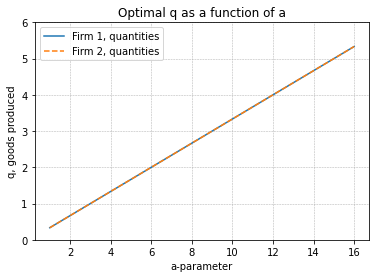

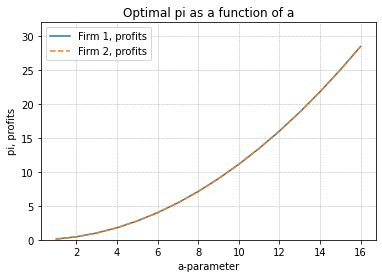

In [15]:
#Run function with the set of parameters and return the wanted variables
a_list,q1_star_list,q2_star_list,pi_1_list,pi_2_list = modelproject.sympy_duopoly(1,16,1,0)


#Plot quantities
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1, label="ax1")
plt.plot(a_list, q1_star_list, label="Firm 1, quantities")
plt.plot(a_list, q2_star_list, "--", label="Firm 2, quantities")
plt.legend()
plt.xlabel("a-parameter")
plt.ylabel("q, goods produced")
plt.ylim(0,6)
plt.grid(linestyle="--", linewidth="0.5")
plt.title("Optimal q as a function of a")

#Plot profits
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1, label="ax2")
plt.plot(a_list, pi_1_list, label="Firm 1, profits")
plt.plot(a_list, pi_2_list, "--", label="Firm 2, profits")
plt.legend()
plt.xlabel("a-parameter")
plt.ylabel("pi, profits")
plt.ylim(0,32)
plt.grid(linestyle="--", linewidth="0.5")
plt.title("Optimal pi as a function of a")

#Show plots
plt.show()

As shown, firm 1 and 2 are on the exact same trajectory in both figures, once again showing the results are correct as the firms are identical. Moreover, note that at a = 12, the firms do in fact produce $q_i$ = 4 and thus $\pi_i$ = 16, which shows the function is running correctly as it is in line with the previous results.

The optimal quantity produced is linearly increasing in a - this makes sense since I set $MC = c = 0$ and therefore there are no downside to producing high quantities. 

Profits are also exponentially increasing with an increase in the a-paramter, also due to the fact that $MC = 0$ as I would expect.

# Numerical solutions

## Numerically solving the duopoly-model

For the numerical solutions I follow the fixed point equilibrium method used in [this article](http://janboone.github.io/competition_policy_and_regulation/Collusion_Cournot/Collusion_Cournot.html).

I calculate and maximize the profit functions as above but now ensuring that each firm is at a fixed point (which is the corresponding Nash Equilibrium). This is done by setting $q = f(q)$ where $f(q_1,q_2)$ is a vector function consisting of the two reaction functions depending on the other firms best response: $r_1(q_2^*)$ and $r_2(q_1^*)$, and $q^* = (q_1^*,q_2^*)$ . I am thus looking for the point where $q^* = f(q^*)$ which is done by solving $q^* - f(q^*)= 0$.

This is done in the modelproject module, using the function "scipy_duopoly".

In [16]:
#I run the duopoly-function and write in my parameters:
a = 12
b = 1
c = 0

opt_vec = modelproject.scipy_duopoly(a,b,c)

print(f"Optimal q1 is: {opt_vec[0]:1.2f} \nOptimal q2 is: {opt_vec[1]:1.2f}")

Optimal q1 is: 4.00 
Optimal q2 is: 4.00


The results given the same parameters are the exact same as we found above

## Numerically solving an extended model - the general Cournot oligopoly model

As shown above, solving the model analytically even with two firms is quite a hassle. I now want to develop a function that can solve the model for any given number of firms.

This is done using the same method as above, but extending the function slightly. The function used is now "scipy_oligopoly".
- In my function I now define the demand function using vectors instead of scalars to allow for easy expanding of the number of firms.
- Demand function is the same
- Profit function is now no longer hardcoded, but depends on the firm index.
- Maximizing profits now requires an intermediate step where I single out a q corresponding to the firm index, before I maximize the profits
- Defining the equilibrium is virtually unchanged except for the way the best-response list is written up

Now I can go through any number of firms I wish by changing the "no_firms" variable and given the parameters find out the optimal quantites produced by each firm when there are that many firms in the market. The list extracted from the function also changes it's size depending on the number of firms in the model.

(Try changing the "no_firms" variable to see how the results change).

In [17]:
no_firms = 2
a = 12
b = 1
c = 0

opt_vec = modelproject.scipy_oligopoly(no_firms,a,b,c)

print(opt_vec)

[3.99998715 3.99998715]


## How does the optimal quantity produced change depending on the number of firms?

Now I examine how the optimal quantity for the firms change depending on the number of firms in the model. 

I set up a function, "scipy_figure", to go through a list of amount of firms. I then run the model for each of these number of firms and extract a list of optimal production choice for the first firm and the number of a list going from 1 to the number of list chosen.

I then plot the two lists up against each other to see how the quantities change depending on the number of firms.

NB: Runtime can be somewhat slow if a very high number of firms is chosen. I choose 16 which does not take too long. If you experience a runtime error if/when changing the number of firms, try again, sometimes it does not work properly.

C:\Users\Simon\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


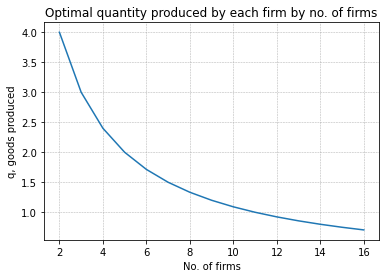

In [18]:
no_firms_iter = 16
a = 12
b = 1
c = 0

opt_vec_list,no_firms_iter_list = modelproject.scipy_figure(no_firms_iter, a, b, c)

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1, label="ax1")
plt.plot(no_firms_iter_list, opt_vec_list)
plt.xlabel("No. of firms")
plt.ylabel("q, goods produced")
plt.grid(linestyle="--", linewidth="0.5")
plt.title("Optimal quantity produced by each firm by no. of firms")

plt.show()

As shown, the optimal quantity produced is decreasing in the number of firms. This makes perfect sense, since a higher number of firms (and no corresponding increase in demand such as in this case) results in each firm producing fewer goods in the market due to lower market share. 

This is very much in line with the general result that a Cournot model with an infinite amount of firms is the same as the perfect competetition model, where each firm produces an infinitely small amount of goods and has no market power. Already with 16 firms the model showcases how the produced quantities are very low compared to the cases with 2 or 3 firms.

# Conclusion

In this project I solved a Cournot oligopoly model three ways:
- Analytically with two firms (a duopoly)
- Numerically with two firms 
- Numerically with any number of firms

The numerical results were in line with the analytical results, showing that functions were working correctly. 

I also showed that when the number of firms are increasing in the Cournot model, the optimal quantity produced by each firm in the model decreases, in line with the limit case for the Cournot model which is equivalent to the Perfect Competition framework.